In [8]:
import keras
from matplotlib import pyplot as plt
import numpy as np
import h5py
import tensorflow as tf

In [9]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [10]:
keras.backend.image_data_format()

'channels_first'

In [11]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [12]:
x_train = x_train / 255.
x_test = x_test / 255.

In [13]:
x_train.shape

(60000, 28, 28)

In [14]:
x_train = x_train.reshape(-1, 1, 28, 28)
x_test = x_test.reshape(-1, 1, 28, 28)

In [15]:
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten
from keras.models import Sequential

In [16]:
import keras.backend.tensorflow_backend as tfback

In [17]:
def _get_available_gpus():  

    if tfback._LOCAL_DEVICES is None:  
        devices = tf.config.list_logical_devices()  
        tfback._LOCAL_DEVICES = [x.name for x in devices]  
    return [x for x in tfback._LOCAL_DEVICES if 'device:gpu' in x.lower()]


tfback._get_available_gpus = _get_available_gpus

In [18]:
lenet = Sequential()
lenet.add(Conv2D(6, kernel_size=3, strides=1, padding='same', input_shape=(1, 28, 28), activation="relu", \
                name='conv1', data_format="channels_first"))

lenet.add(MaxPool2D(pool_size=2, strides=2, name='pool1', data_format='channels_first'))

lenet.add(Conv2D(16, kernel_size=5, strides=1, padding='valid', activation="relu", \
                 name='conv2', data_format="channels_first"))

lenet.add(MaxPool2D(pool_size=2, strides=2, name='pool2', data_format="channels_first"))
lenet.add(Flatten(name='flatten', data_format="channels_last"))
lenet.add(Dense(120, activation="relu", name='fc1'))
lenet.add(Dense(84, activation="relu", name='fc2'))
lenet.add(Dense(10, activation='softmax', name='softmax'))

In [19]:
lenet.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv2D)               (None, 6, 28, 28)         60        
_________________________________________________________________
pool1 (MaxPooling2D)         (None, 6, 14, 14)         0         
_________________________________________________________________
conv2 (Conv2D)               (None, 16, 10, 10)        2416      
_________________________________________________________________
pool2 (MaxPooling2D)         (None, 16, 5, 5)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
fc1 (Dense)                  (None, 120)               48120     
_________________________________________________________________
fc2 (Dense)                  (None, 84)               

In [20]:
lenet.compile('sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [21]:
lenet.fit(x_train, y_train, batch_size=64, epochs=50, validation_data=[x_test, y_test])

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 10s 163us/step - loss: 0.8021 - accuracy: 0.7618 - val_loss: 0.2386 - val_accuracy: 0.9274
Epoch 2/50
60000/60000 [==============================] - 10s 162us/step - loss: 0.1934 - accuracy: 0.9412 - val_loss: 0.1370 - val_accuracy: 0.9589
Epoch 3/50
60000/60000 [==============================] - 12s 201us/step - loss: 0.1358 - accuracy: 0.9585 - val_loss: 0.1102 - val_accuracy: 0.9682
Epoch 4/50
60000/60000 [==============================] - 11s 182us/step - loss: 0.1090 - accuracy: 0.9664 - val_loss: 0.0927 - val_accuracy: 0.9711
Epoch 5/50
60000/60000 [==============================] - 10s 167us/step - loss: 0.0943 - accuracy: 0.9713 - val_loss: 0.0869 - val_accuracy: 0.9722
Epoch 6/50
60000/60000 [==============================] - 12s 192us/step - loss: 0.0840 - accuracy: 0.9736 - val_loss: 0.0739 - val_accuracy: 0.9760
Epoch 7/50
60000/60000 [==============================] 

In [25]:
lenet.save('LeNet_NCHW2.h5')

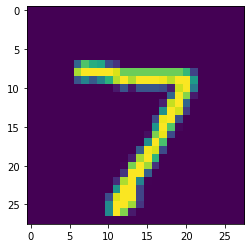

In [27]:
plt.imshow(x_test[0][0])

In [28]:
lenet.load_weights('LeNet_NCHW2.h5')

In [29]:
image_7 = np.expand_dims(x_test[0], axis=0)
pred = lenet.predict(image_7)

In [30]:
result = np.where(pred == np.amax(pred))[1][0]
result

7

In [31]:
print("[INFO] evaluating...")
(loss, accuracy) = lenet.evaluate(x_test, y_test, verbose=1)
print("[INFO] accuracy: {:.2f}%".format(accuracy * 100))

[INFO] evaluating...
10000/10000 [==============================] - 1s 105us/step
[INFO] accuracy: 98.57%
